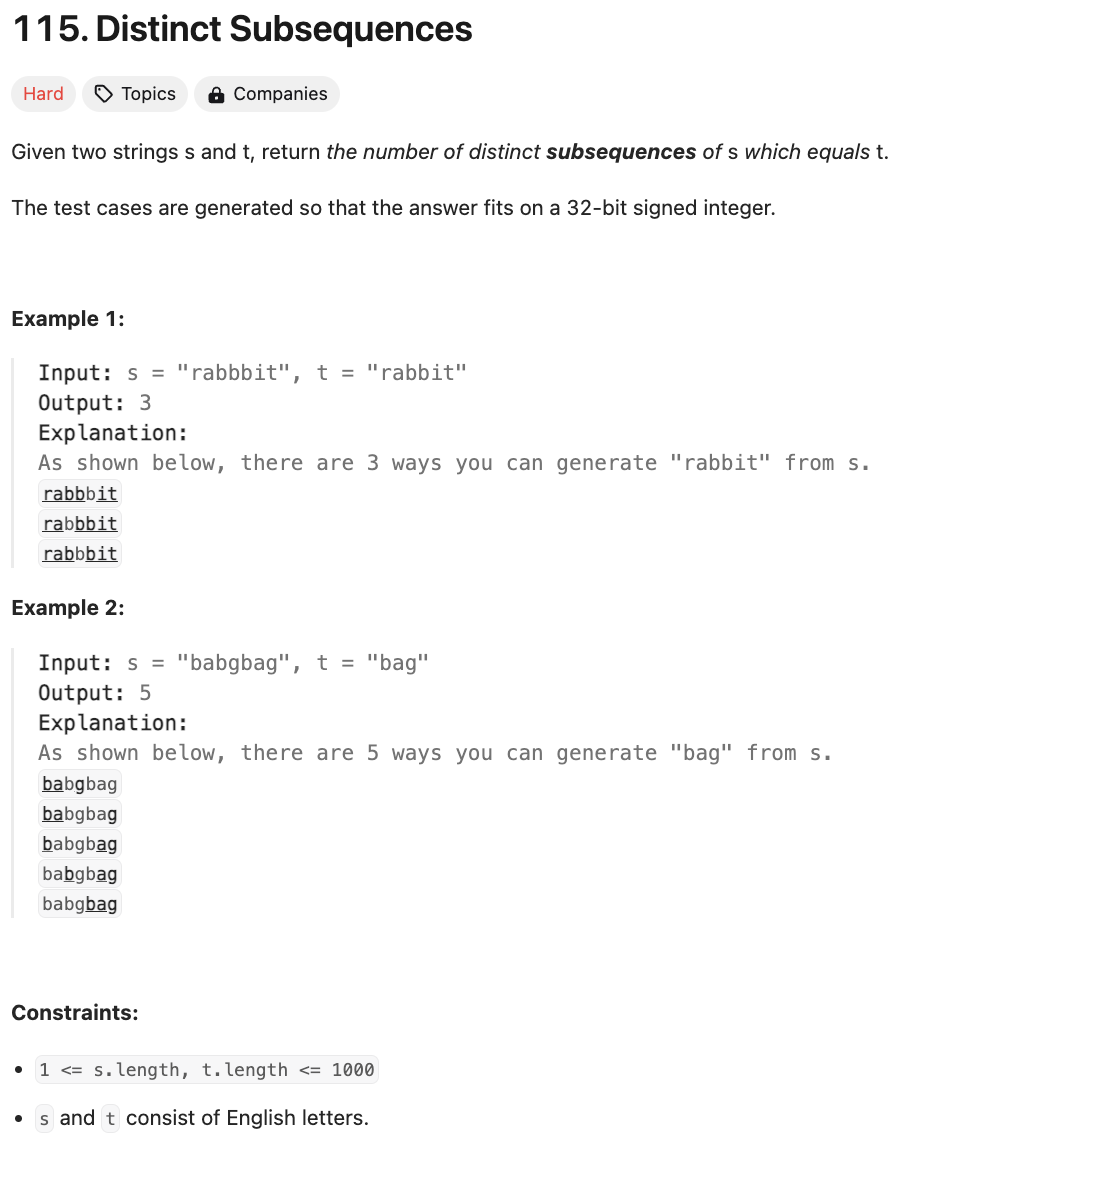

In [1]:
class Solution:
    def numDistinct(self, s: str, t: str) -> int:
        # Memoization dictionary to store results of subproblems
        memo = {}

        def dfs(i, j):
            # Base case 1: If we've matched all characters in t
            if j == len(t):
                return 1
            
            # Base case 2: If we've exhausted s but t still has unmatched characters
            if i == len(s):
                return 0
            
            # Check if the result for (i, j) is already computed
            if (i, j) in memo:
                return memo[(i, j)]

            # Recursive case: Characters match or don't match
            if s[i] == t[j]:
                # Option 1: Use the current character in s to match t[j]
                # Option 2: Skip the current character in s
                memo[(i, j)] = dfs(i + 1, j + 1) + dfs(i + 1, j)
            else:
                # Skip the current character in s
                memo[(i, j)] = dfs(i + 1, j)
            
            return memo[(i, j)]

        # Start the recursion with the initial indices
        return dfs(0, 0)


In [5]:
Solution().numDistinct("rabbbit","rabbit")


3

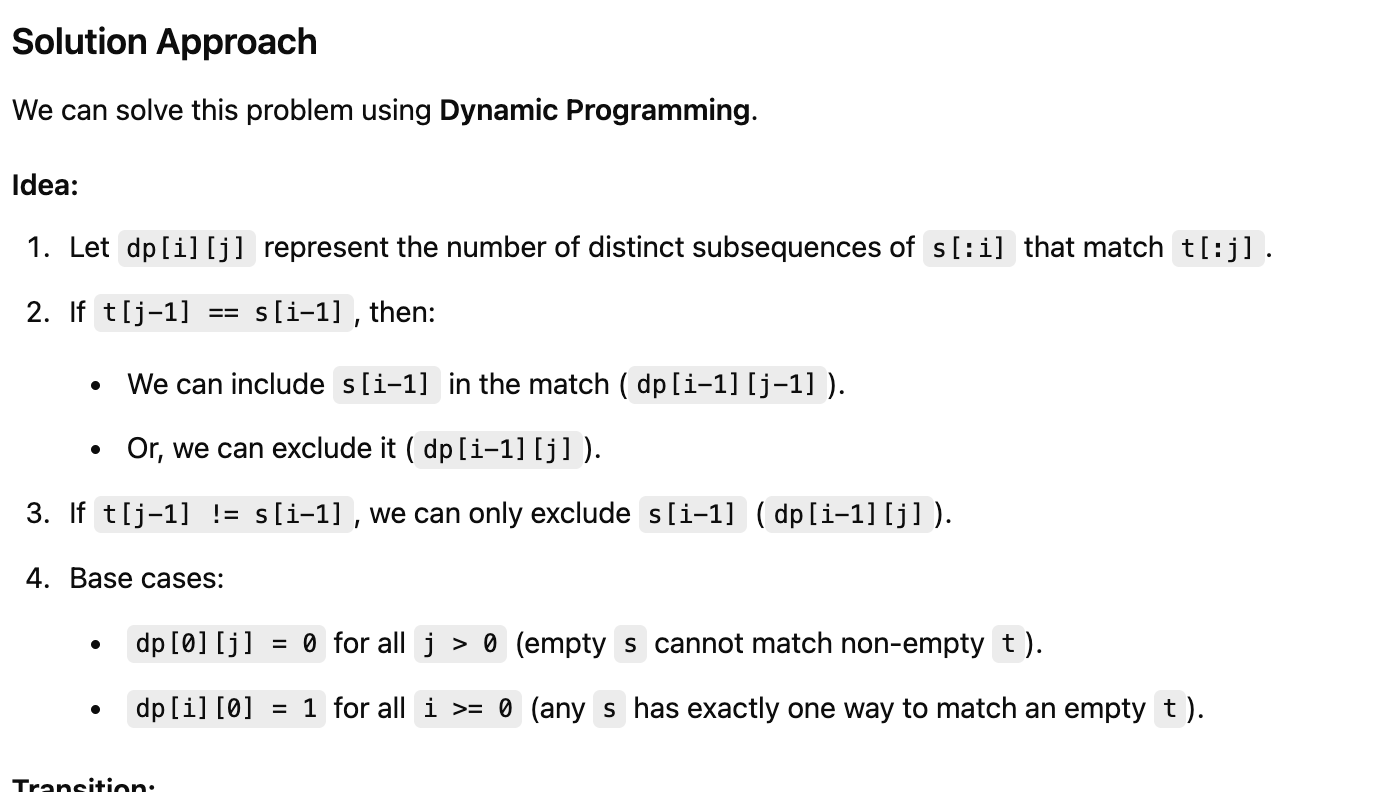

In [ ]:
def numDistinct(s: str, t: str) -> int:
    m, n = len(s), len(t)
    # dp[i][j] will store the number of subsequences of s[:i] that match t[:j]
    dp = [[0] * (n + 1) for _ in range(m + 1)]
    
    # Base case: dp[i][0] = 1 for all i (empty t)
    for i in range(m + 1):
        dp[i][0] = 1
    
    # Fill the dp table
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if s[i - 1] == t[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + dp[i - 1][j]
            else:
                dp[i][j] = dp[i - 1][j]
    
    return dp[m][n]


************************************************************************************************************************************************************************************************************

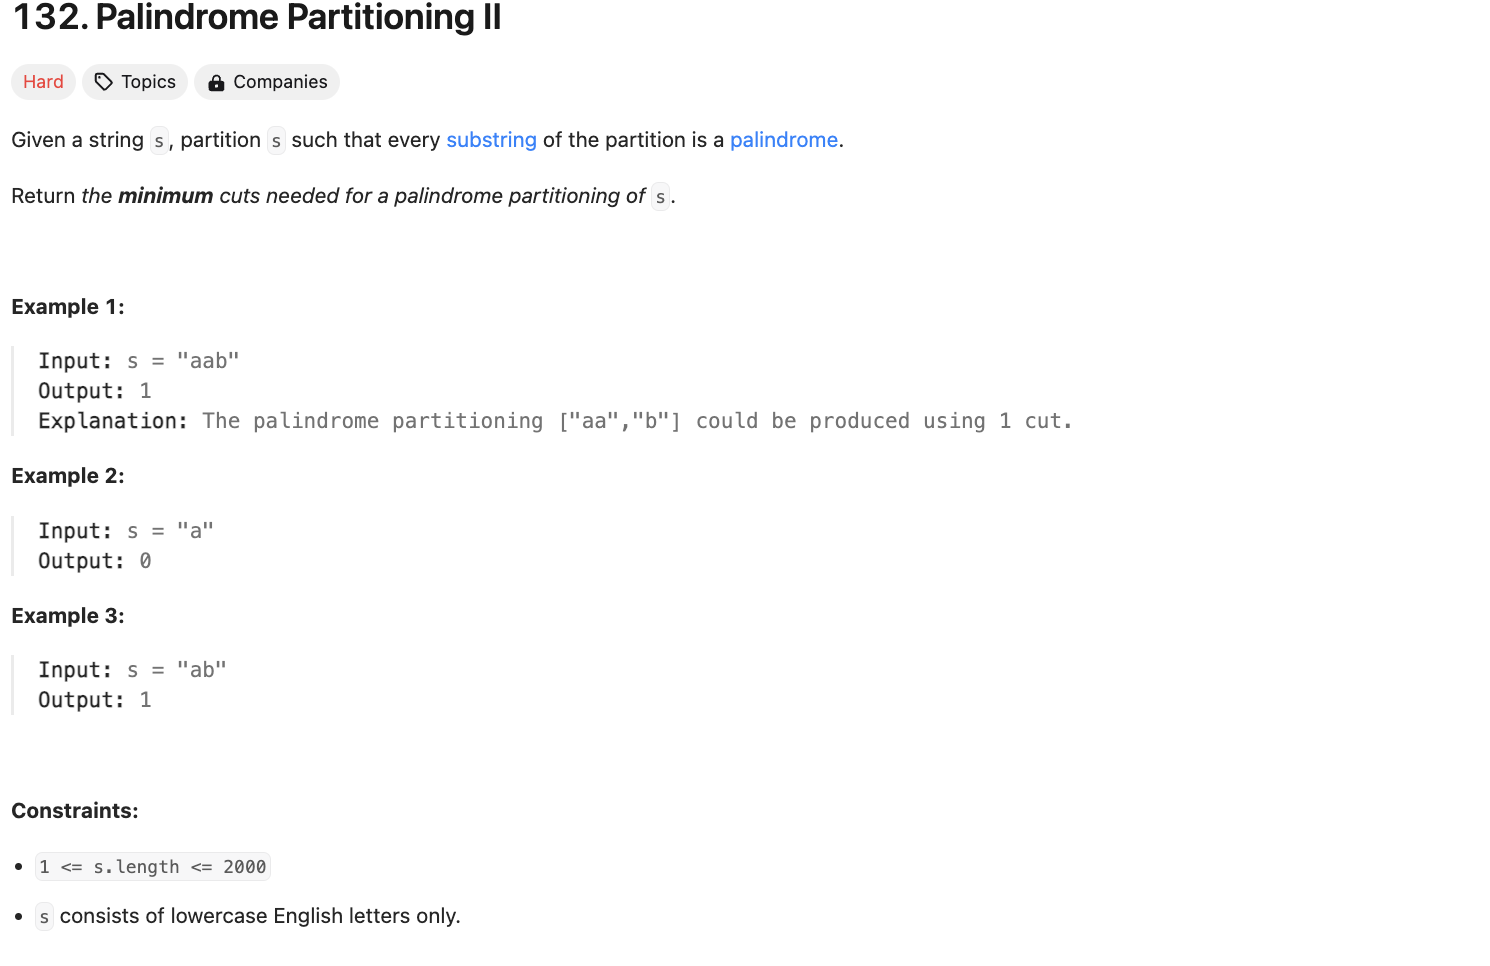

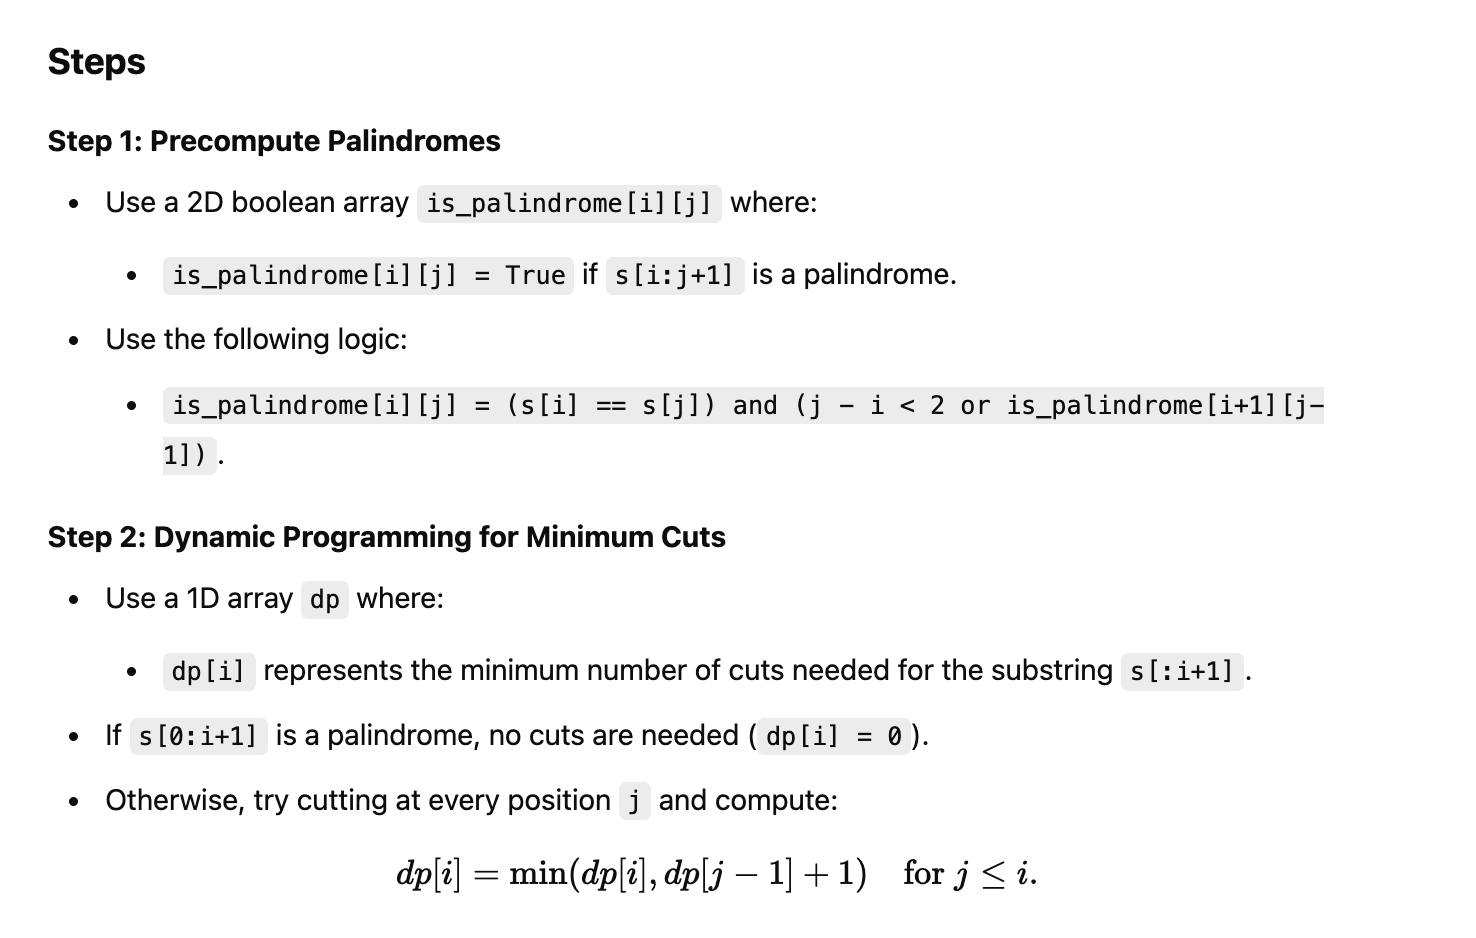

In [18]:
class Solution:
    def minCut(self, s: str) -> int:
        n = len(s)
        
        # Step 1: Precompute palindromes
        is_palindrome = [[False] * n for _ in range(n)]
        for end in range(n):
            for start in range(end + 1):
                #print(start,end)

                if s[start] == s[end] and (end - start < 2 or is_palindrome[start + 1][end - 1]):
                    is_palindrome[start][end] = True
                    
        
        # Step 2: Dynamic Programming for minimum cuts
        dp = [float('inf')] * n
        for i in range(n):
            if is_palindrome[0][i]:
                dp[i] = 0  # No cuts needed if the whole substring is a palindrome
            else:
                for j in range(1, i + 1):
                    if is_palindrome[j][i]:
                        dp[i] = min(dp[i], dp[j - 1] + 1)
        
        return dp[-1]


In [20]:
Solution().minCut("madamabac")

2

************************************************************************************************************************************************************************************************************

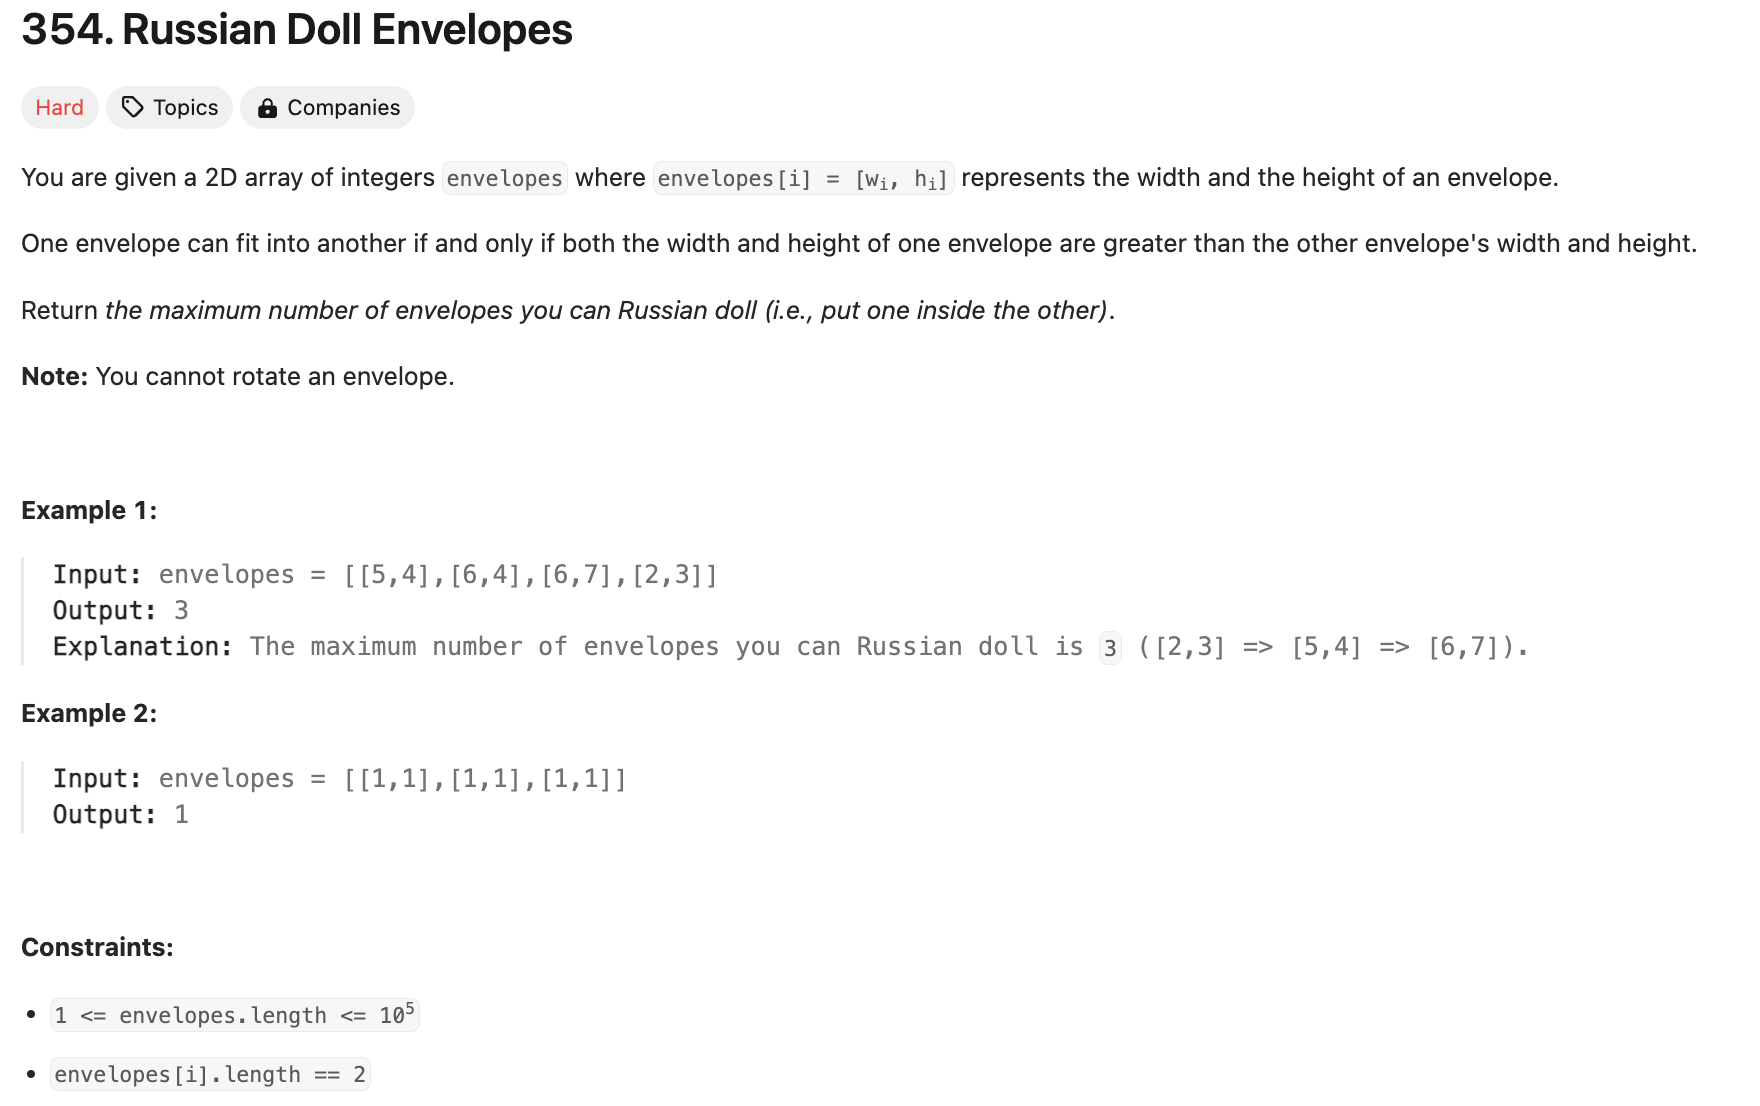

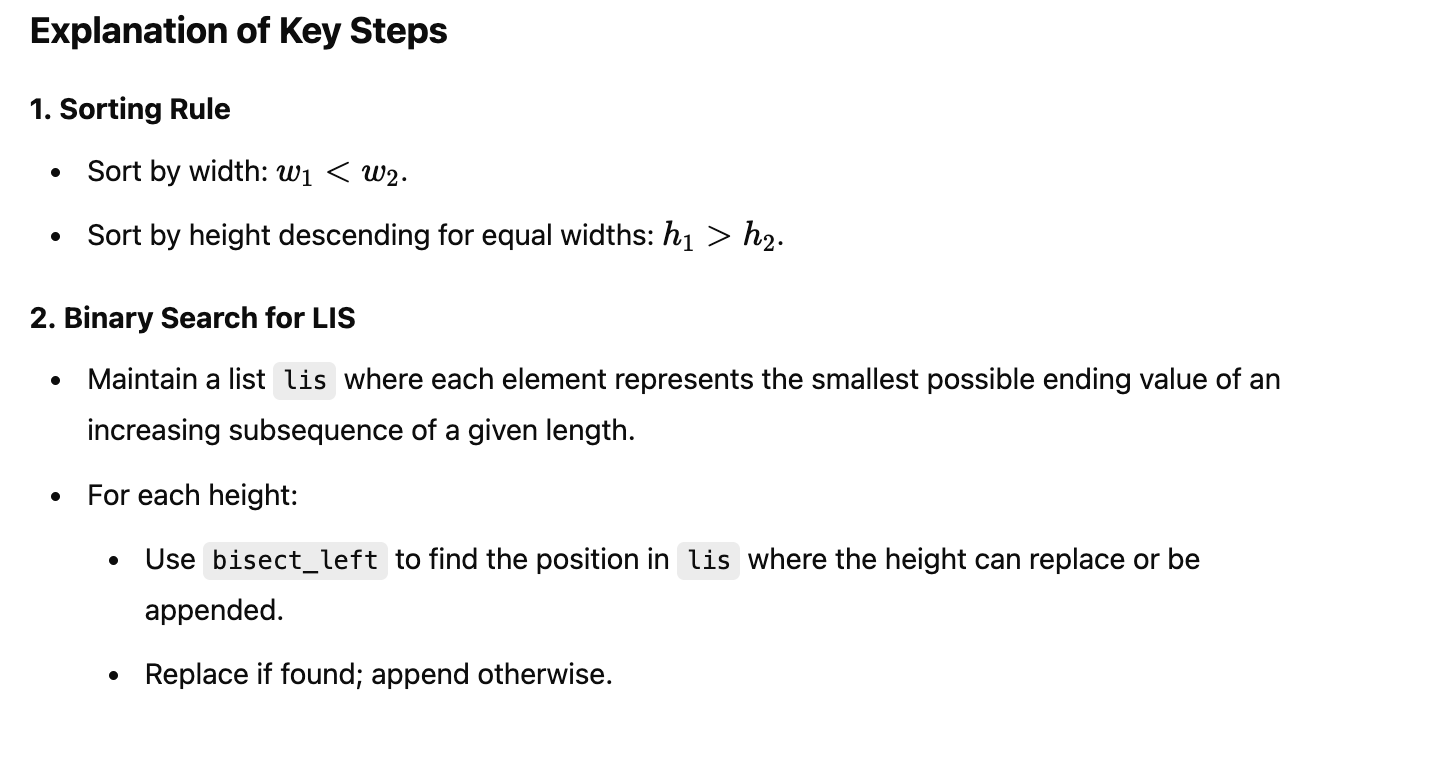

In [22]:
from bisect import bisect_left

class Solution:
    def maxEnvelopes(self, envelopes: list[list[int]]) -> int:
        # Step 1: Sort envelopes by width ascending and height descending
        envelopes.sort(key=lambda x: (x[0], -x[1]))
        
        # Step 2: Extract heights
        heights = [h for _, h in envelopes]
        
        # Step 3: Find LIS in heights
        # Initialize an empty list to store the LIS
        lis = []
        for h in heights:
            # Use binary search to find the position to replace or append
            pos = bisect_left(lis, h)
            if pos == len(lis):
                lis.append(h)
            else:
                lis[pos] = h
        
        return len(lis)


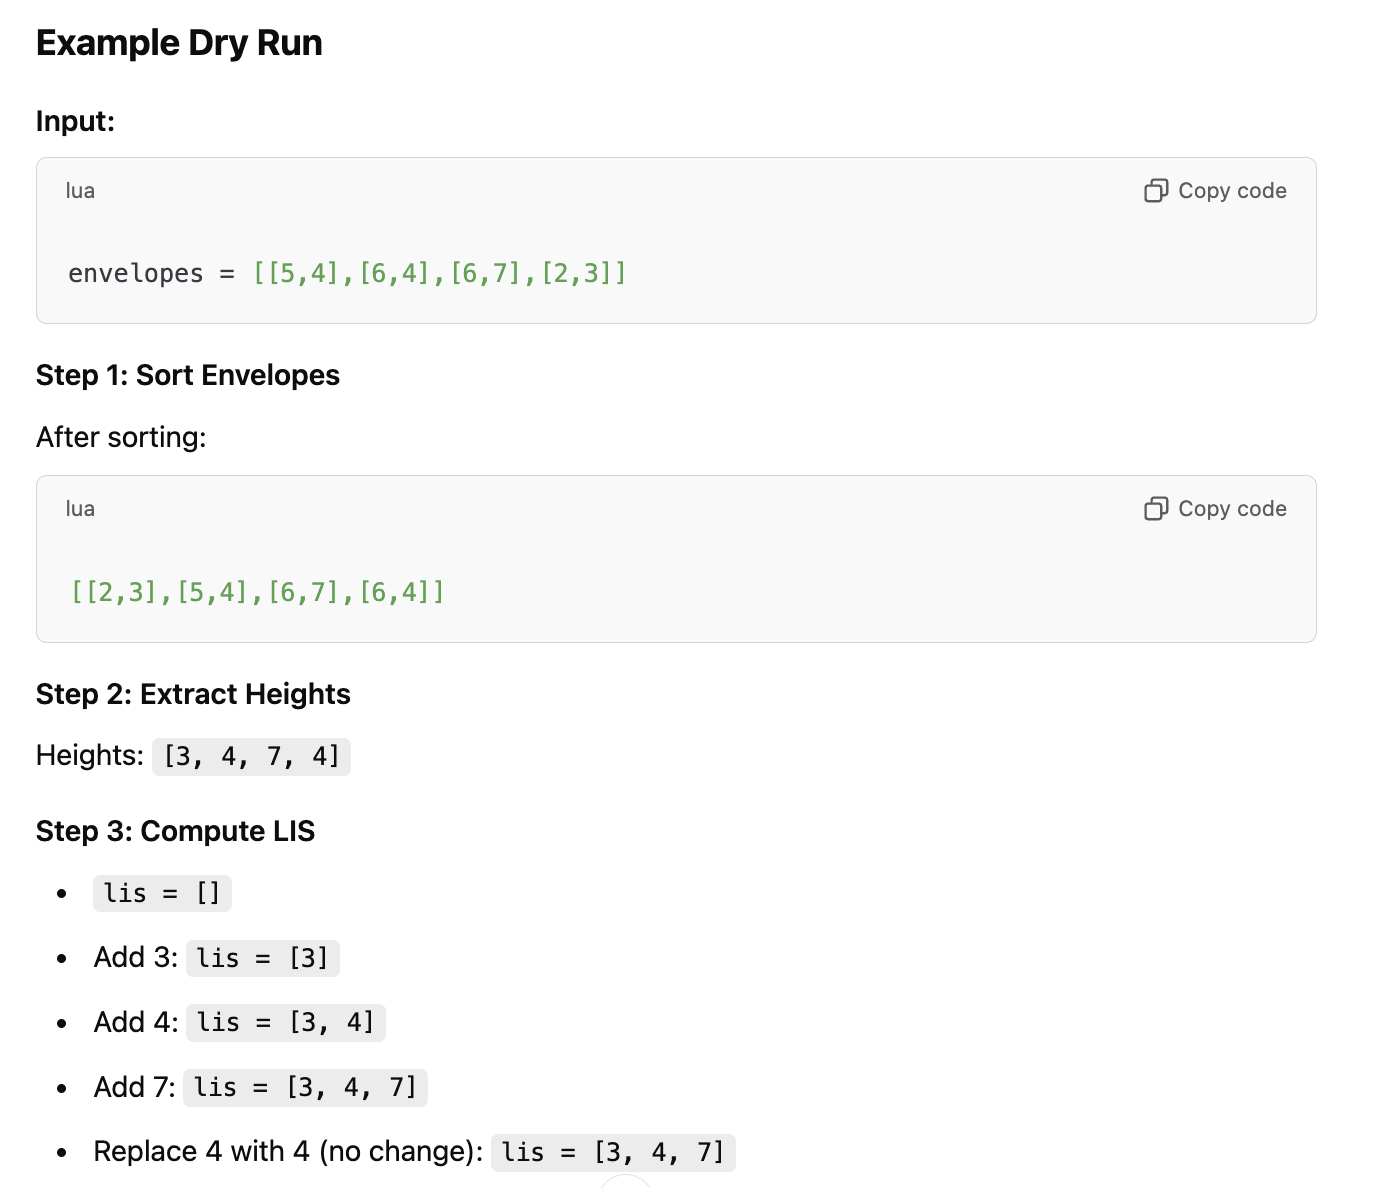

In [28]:
envelopes = [[5,4],[6,4],[6,7],[2,3],[1,2]]
Solution().maxEnvelopes(envelopes)

4

************************************************************************************************************************************************************************************************************

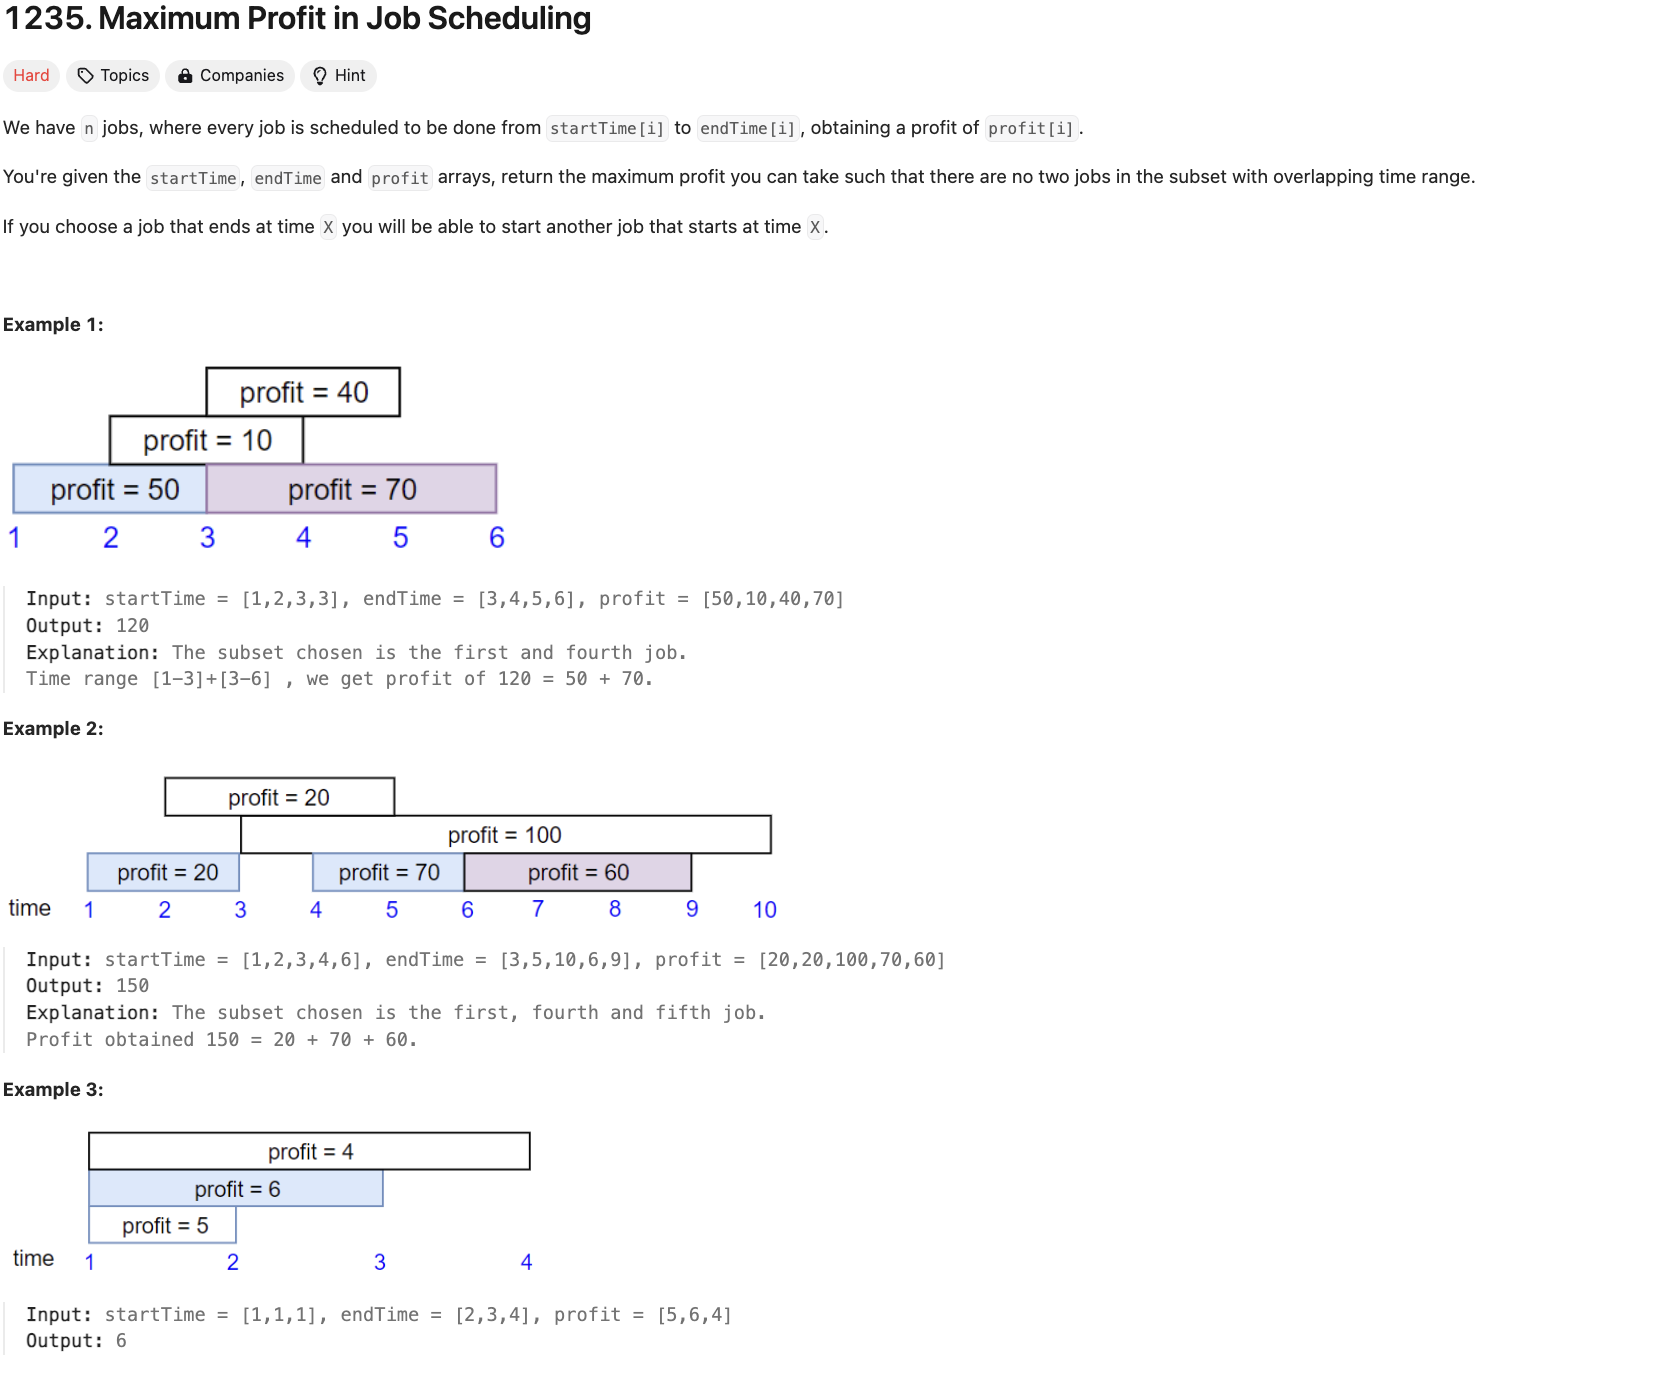

************************************************************************************************************************************************************************************************************


************************************************************************************************************************************************************************************************************

************************************************************************************************************************************************************************************************************

************************************************************************************************************************************************************************************************************

************************************************************************************************************************************************************************************************************

************************************************************************************************************************************************************************************************************

************************************************************************************************************************************************************************************************************